In [71]:
# Origin: Code for week 3 of programming class.
# Author: Tyler Abbot
# Title: week_3_code.ipynb
# Last modified: 2016.08.03

NOTE: If you want to hide the code, use this:

http://chris-said.io/2016/02/13/how-to-make-polished-jupyter-presentations-with-optional-code-visibility/

# Introduction

Today's class will introduce you to functions in R. The notes are written in the Jupyter notebook in order to make things easier to run in class, but the same code is available in an R script in the course repository.

## Today's Objective

Our goal for the day is to become familiar with functions. We would like to achieve the following objectives:
1. Learn how a computer represents mathematical functions.
2. Learn how a programmatic function works.
3. Learn how to define our own functions.
4. Learn about data types, function arguments, and namespaces.
5. Learn how to nest functions.

If by the end of the class, you feel we haven't sufficiently covered one of these, speak up!

## A Working Example : Monte Carlo

The idea behind Monte Carlo is to approximate an integral by an average. If we take a random variable $X \sim f(x)$ and draw a sample $\{x_i\}_{i=1}^N$, then the following should hold:
$$
\mathbb{E}X = \int x f(x) dx \approx \frac{1}{N}\sum_i x_i
$$
Maybe the distribution $f(\cdot)$ is difficult to calculate or unknown, but we can still generate draws of $x_i$. In any case, we'll use this simple example as our working example for this class.

## What's a function?

You probably know what a mathematical function is, a mapping from some abstract space to another. Arguments go in, results come out. For example $f(x) = x^2$ is a function.

You've already seen functions in this class. For example addition:

In [1]:
1 + 1

[1] 2

You've also seen more abstract functions, such as `typeof`:

In [2]:
typeof(1.0)

[1] "double"

These are native R functions. You can also define your own functions. For example let's define our own addition function (redundant, I know, but it's pedagogical):

In [4]:
add <- function(a, b){
    return(a + b)
}

In [6]:
add(1, 1)

[1] 2

That's it! That's all there is to defining a function. However, we will need to discuss some of the more tedious points of functions in order to truly understand how they work.

Before we move on, note that if you would like to display the code of a function, you can always do sy by executing its name without parenthesis:

In [9]:
add

function(a, b){
    return(a + b)
}

## Code Documentation

Before we move on it is important to discuss documentation. You should always document your functions in order to be able to share them with others and remember yourself why you wrote them. Take for example the following function:

In [17]:
whereis <- function(pattern, word){
    return(grep(pattern, word))
}
whereis('I', 'Im lost')

[1] 1

If you are new to programming (as most of you are) this probably seems pretty opaque. To that end, one usually has help documents:

In [13]:
?grep

grep {base},R Documentation
pattern,"character string containing a regular expression (or character string for fixed = TRUE) to be matched in the given character vector. Coerced by as.character to a character string if possible. If a character vector of length 2 or more is supplied, the first element is used with a warning. Missing values are allowed except for regexpr and gregexpr."
"x, text","a character vector where matches are sought, or an object which can be coerced by as.character to a character vector. Long vectors are supported."
ignore.case,"if FALSE, the pattern matching is case sensitive and if TRUE, case is ignored during matching."
perl,logical. Should Perl-compatible regexps be used?
value,"if FALSE, a vector containing the (integer) indices of the matches determined by grep is returned, and if TRUE, a vector containing the matching elements themselves is returned."
fixed,"logical. If TRUE, pattern is a string to be matched as is. Overrides all conflicting arguments."
useBytes,logical. If TRUE the matching is done byte-by-byte rather than character-by-character. See ‘Details’.
invert,logical. If TRUE return indices or values for elements that do not match.
replacement,"a replacement for matched pattern in sub and gsub. Coerced to character if possible. For fixed = FALSE this can include backreferences ""\1"" to ""\9"" to parenthesized subexpressions of pattern. For perl = TRUE only, it can also contain ""\U"" or ""\L"" to convert the rest of the replacement to upper or lower case and ""\E"" to end case conversion. If a character vector of length 2 or more is supplied, the first element is used with a warning. If NA, all elements in the result corresponding to matches will be set to NA."


But the custom function that just wraps around `grep` does not have a help entry:

In [18]:
# This returns nothing
?whereis

No documentation for ‘whereis’ in specified packages and libraries:
you could try ‘??whereis’

To fix this we should provide documentation, not only for others but for yourself when you come back in 3 months and try to understand your own code. The syntax for our documentation will follow that for `roxygen`, a package we'll look at later in the course. For now, just blindly follow my lead:

In [20]:
#' The first entry containing a letter or word.
#'
#' @param pattern String: a pattern to search for
#' @param word String: a string in which to search
#' @return The index to the first occurence of pattern in word.
#' @seealso \code{\link{grep}} which this function wraps
#' @export
whereis <- function(pattern, word){
    return(grep(pattern, word))
}
whereis('I', 'Im lostI')

[1] 1

Later we will use this data to generate help documentation automatically. For the rest of today, we'll leave the documentation aside, but you should document **everything** you do. It is good practice and just takes a copy and paste with some editing.

## A Slightly More Complicated Function
Let's look back to our Monte Carlo estimate. Our over all goal is to write a function to calculate this from start to finish, but we can consider it a series of subproblems:

2. Take in user input about the problem.
1. Generate a random sample.
3. Sum up the realizations.
4. Divide by the number of realizations.
5. Output the results.

Although we may not need all of these steps, let's take one of them as an example: summation.

How can we write a function that, given a series of numbers (in our case this will simply be a vector), calculates the sum of the entries? Let's first try to do this outside of a function:

In [18]:
# Define a vector to sum.
x <- rep(1, 10)
print(x)

# There are several ways to calculate the sum.
summation <- 0
for(i in 1:length(x)){
    summation <- summation + x[i]
}
print(summation)

# I have no idea why this isn't working, could be a bug in Jupyter
summation <- 0
i <- 0
while(i < length(x)){
    summation <- summation + x[i]
    i <- i + 1
}
print(summation)

summation <- 0
for(i in x){
    summation <- summation + i
}
print(summation)

print(sum(x))

 [1] 1 1 1 1 1 1 1 1 1 1
[1] 10
numeric(0)
[1] 10
[1] 10


For now I don't care what method you choose, but be aware of the differences between these three and note that they are not all equal: one is **much** faster than the others. Do you know which?

Let's wrap one of our loops in a function and we'll check:

In [1]:
our_sum <- function(x){
    summation <- 0
    for(i in x){
        summation <- summation + i
    }
    return(summation)
}

x <- rep(1, 1000000)

system.time(sum(x))
system.time(our_sum(x))

   user  system elapsed 
  0.004   0.000   0.005 

   user  system elapsed 
  0.408   0.000   0.409 

We won't get into why this is so much slower, but we will cover it later in the course. For now, know that any built in functions (in particular native functions) will be faster than your own attempts.

![we are worms](waynes_world.png)

## Data Types, Arguments, and Name Spaces
Now that we see how to create a function, how to time our function, and understand that the programmers who created R are our superiors in every way (well, at least in terms of speed), we need to consider what goes into our functions.

Let's look at our summation loop function again:

In [19]:
our_sum <- function(x){
    summation <- 0
    for(i in x){
        summation <- summation + i
    }
    return(summation)
}

We've written a function for a specific purpose, to add up all the entries in a vector, but what if someone else comes along and tries to use this function for something else? Can they?

This question is related to **data types**. The data type refers to what is the type of the object, for example: 

In [25]:
typeof(1)
typeof(c(1, 2))
typeof('a string')
typeof(TRUE)

[1] "double"

[1] "double"

[1] "character"

[1] "logical"

The type is important, because our function might not be able to add entries in a string or a boolean:

In [29]:
our_sum(c(TRUE, FALSE, TRUE))
our_sum('a string')

[1] 2

ERROR: Error in summation + i: non-numeric argument to binary operator


In fact, it can add booleans, but not strings! It is important to keep in mind the data type that your function is designed to handle in order to predict its behavior should you make a mistake. If you pass a string by accident, you will get an error, but if you pass a vector of booleans by accident, your program will continue to run.

Another thing to consider is the arguments that go into a function. These are the actual variables and take on three types (for now...):

1. **Positional Arguments** - These are arguments that must be entered in the correct order and must be specified by the user.
2. **Keyword Arguments** - These are arguments which are specified based on their name.
3. **Default Arguments** - These are given a default value in the function definition.

Let's take a look at all of these different types of arguments in a new example function. Sticking with Monte Carlo, let's write a function that takes in a number of samples and a distribution function and returns a vector of random numbers (there are already functions that do this, but this is pedagogical):

In [4]:
rand_sample <- function(n, F_inv=function(x) x){
    unif_sample <- runif(n)
    return(F_inv(unif_sample))
}

**Before we move on, can you answer these questions?**
> What is this function doing (as in what is the statistical transformation called)?

> What is `f_inv`, in a statistical/mathematical sense?

This information is exactly what you should put in the documentation.

Ok, back to arguments. Here `n` is a positional argument and `f_inv` a default argument. We can also refer to `n` as a keyword argument and `f_inv` as a positional argument. Let's see some examples: 

In [7]:
# Simply calling the function
rand_sample(5)

# Calling the function with a new distribution
F_inv_unif <- function(x, a, b) x*(b - a) + a
rand_sample(5, F_inv=function(x) F_inv_unif(x, 0, 10))
    
# Letting n be a keyword argument
rand_sample(n=5)

# Letting both arguments be positional
rand_sample(5, function(x) F_inv_unif(x, 0, 10))

[1] 0.34013722 0.14912014 0.21804925 0.03179893 0.38047236

[1] 8.991636 3.154018 7.372387 8.917210 1.886920

[1] 0.2895828 0.1095862 0.2066132 0.2102653 0.3529880

[1] 6.335071 9.515584 5.243979 3.637163 4.616190

These points are more semantics now, but it is useful to understand how to discuss these issues. At some point soon you will get stuck and go to Stack Exchange to ask questions, so you better know what they mean!

Now we should consider what's called the **namespace**. This is the hypothetical space in which your variables live. Not all namespaces are equal and variables defined in different namespaces have different **scope**, which refers to how far they reach in the program.

Let's see an example of how the **global namespace** and the **function namespace** differ:

In [ ]:
test_function <- function(x){
    # A variable that only lives within the function
    func_var <- 'Im local'
    print(func_var)
}
test_function(1.0)
# Trying to call the variable func_var throws an error
func_var

The variable `func_var` is said to be a **local variable**, that is it only lives locally in the function's namespace.

We can also try to reference a **global variable**, which lives in the global namespace, from within a function. However, we will get a different result:

In [18]:
# A variable that lives in the global namespace
glob_var <- 'Im global'
test_function <- function(x){
    # Trying to call a global variable from within a function
    print(glob_var)
}
test_function(1.0)

[1] "Im global"


This is because the scope of global variables is larger than that of local variables (hence the name). However, you should be careful when modifying global variables within a function:

In [21]:
# A variable that lives in the global namespace
glob_var <- 'Im global'
test_function <- function(x){
    # Trying to call a global variable from within a function
    print(glob_var)
    glob_var <- "I'm modified."
    print(glob_var)
}
test_function(1.0)
print(glob_var)

[1] "Im global"
[1] "I'm modified."
[1] "Im global"


It is possible to modify global variables from within a function, but this is **bad form**. I hate it so much, I'm not even going to tell you how to do it. In fact, I don't even know how to do it, so don't ask! If you want to go around modifying global variables, that's your own choice, but I won't help you.

They're so bad there are even memes about it:

![global kitten](globals.jpg)

The key thing to keep in mind is that a local namespace contains only variables defined within a function. You should pass variables between functions as arguments, lists of arguments, or as variable-length arguments (which we will not cover today).

## Nesting Functions
Now that we understand how to define functions, how to pass them different types of arguments, and how to manage the namespaces of our functions, let's think about more complex functions.

Good programming form is to define functions for very simple operations and then **nest** them. Nesting functions refers to wrapping functions around eachother, like a nested doll.

![nested doll](nested.jpg)

You do this every time you call a built in function within your own functions. Let's write a function that runs a monte carlo simultion for the mean of a random variable, using our functions already written:

In [22]:
rand_sample <- function(n, F_inv=function(x) x){
    unif_sample <- runif(n)
    return(F_inv(unif_sample))
}

In [24]:
mc_mean <- function(n, F_inv=function(x) x){
    sample <- rand_sample(n, F_inv=function(x) F_inv(x))
    return(sum(sample)/n)
}

In [28]:
mc_mean(1)
mc_mean(10)
mc_mean(100)
mc_mean(1000)
mc_mean(10000)

[1] 0.8555119

[1] 0.3715243

[1] 0.4839788

[1] 0.511499

[1] 0.495807

That's it! We've nested the `rand_sample` and `sum` functions inside of `mc_mean`! We could take this a step further and nest the `mc_mean` function inside of another function to plot its results for different values of `n`. This will show the convergence of our estimator:

In [64]:
plot_results <- function(n_vec, F_inv=function(x) x){
    results <- rep(0, length(n_vec))
    i <- 1
    for(n in n_vec){
        results[i] <- mc_mean(n)
        i <- i + 1
    }
    plot(n_vec, results, type="l")
}

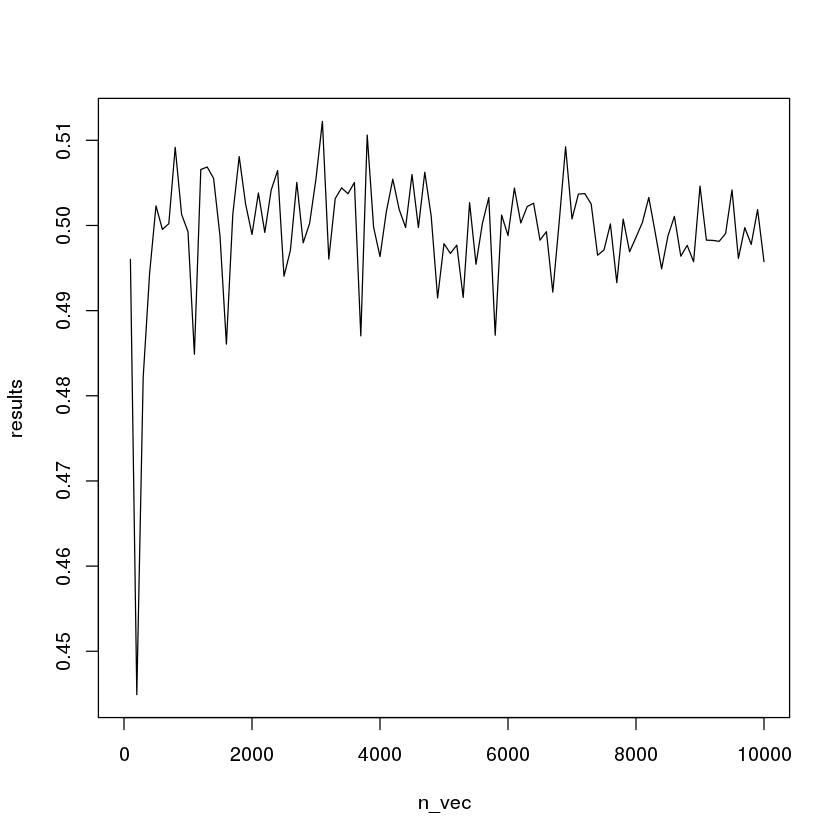

In [70]:
# A quick example
N <- seq(0, 10000, 100)

# This one takes a lot longer
#N <- seq(0, 1000000, 1000)
plot_results(N)

## Conclusion
That's it! That's all you need to know about functions... hopefully. We should have covered the following:

1. Learn how a computer represents mathematical functions.
2. Learn how a programmatic function works.
3. Learn how to define our own functions.
4. Learn about data types, function arguments, and namespaces.
5. Learn how to nest functions.

# Homework:

1. Choose five of the functions we wrote and write documentation for them. You can either use the `roxygen` format or your own, but I need to understand what the function does, what its arguments mean/what their datatypes are, who made it, and when was it made.
2. Re-run the above sets of simulations (for some set of `n`) and plot the results for the a uniform variable on $[0, 10]$.
3. Create a function that calculates the inverse cdf of any random variable you would like. (If you don't have a favorite random variable, use  $X \sim f(x) = 3x^2$... but don't forget to calculate the cdf!)
2. Run a Monte Carlo simulation to estimate the mean of the random variable from your answer to (3). Does your estimated solution match the theoretical value? **NOTE:** If you just copy and paste, there will be an error... it's up to you to track it down!
3. Run a Monte Carlo simulation to estimate the mean of a standard normal random variable, i.e. $X \sim \mathcal{N}(0, 1)$.
4. Modify the above functions to estimate *any* moment by Monte Carlo.